<a href="https://colab.research.google.com/github/AyanRoy22/Room_Occupancy_Detection/blob/main/Room_Occupency_Detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install imbalanced-learn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/Colab Notebooks/Classification Project/'

Mounted at /content/drive


In [124]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Classification Project/datatraining.txt')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Classification Project/datatest.txt')
val = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Classification Project/datatest2.txt')

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [127]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [128]:
train

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [129]:
train.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [130]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


<Axes: xlabel='Occupancy', ylabel='count'>

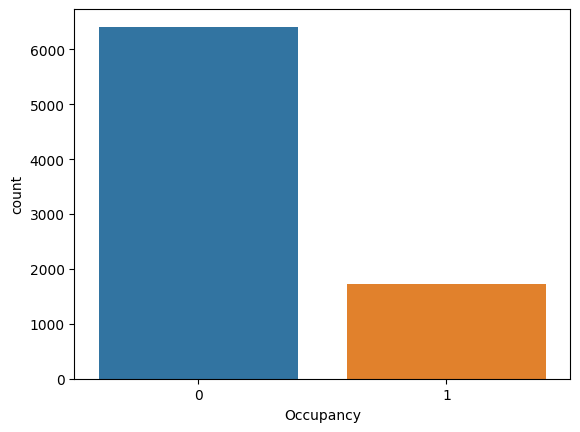

In [131]:
sns.countplot(x = 'Occupancy', data = train)
# The dataset is imbalanced

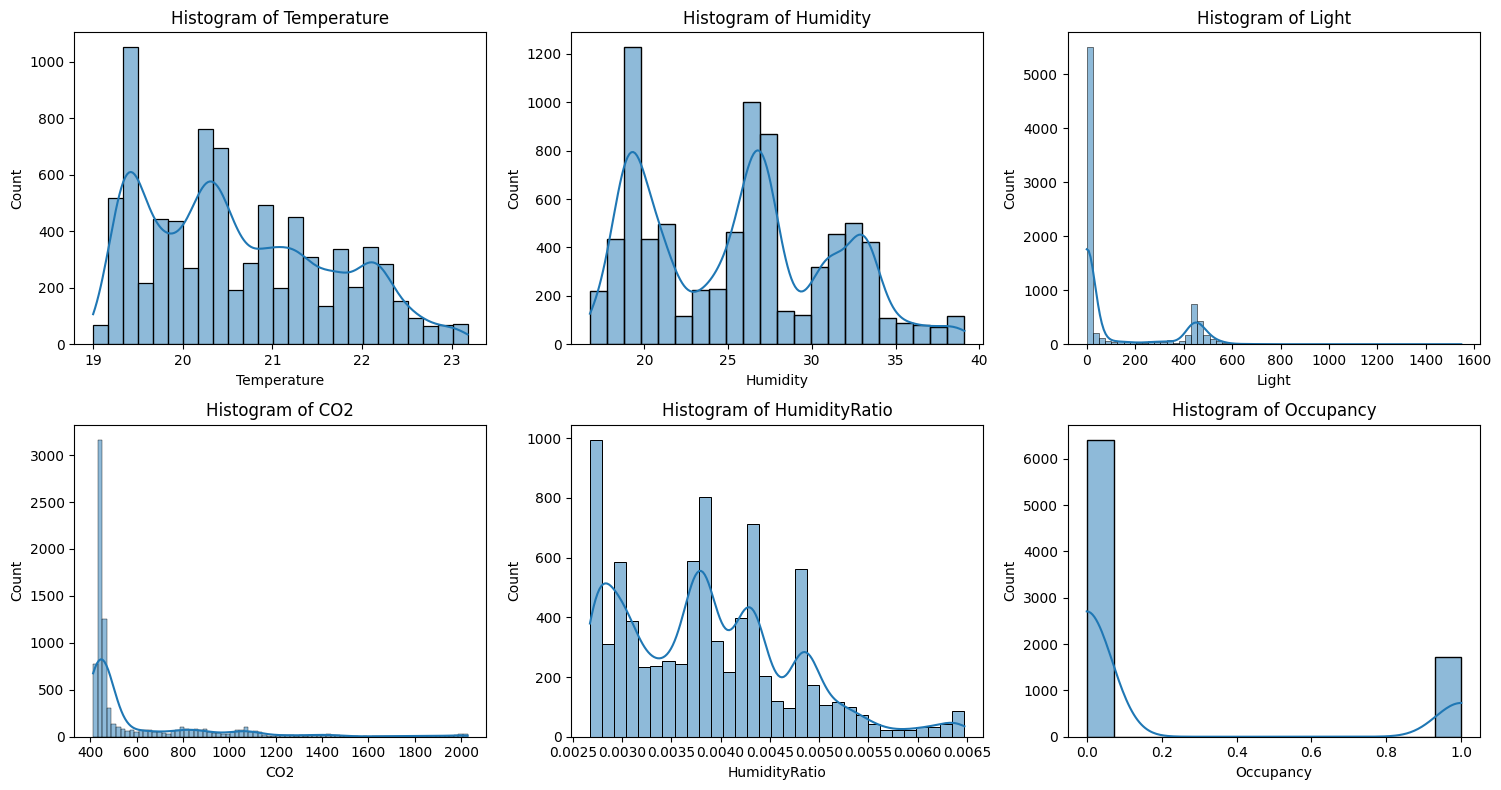

In [132]:
numeric_cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

# Plot histograms
for i, column in enumerate(numeric_cols):
    row, col = i // 3, i % 3
    sns.histplot(train[column], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Histogram of {column}')

# Show the plots
plt.tight_layout()
plt.show()

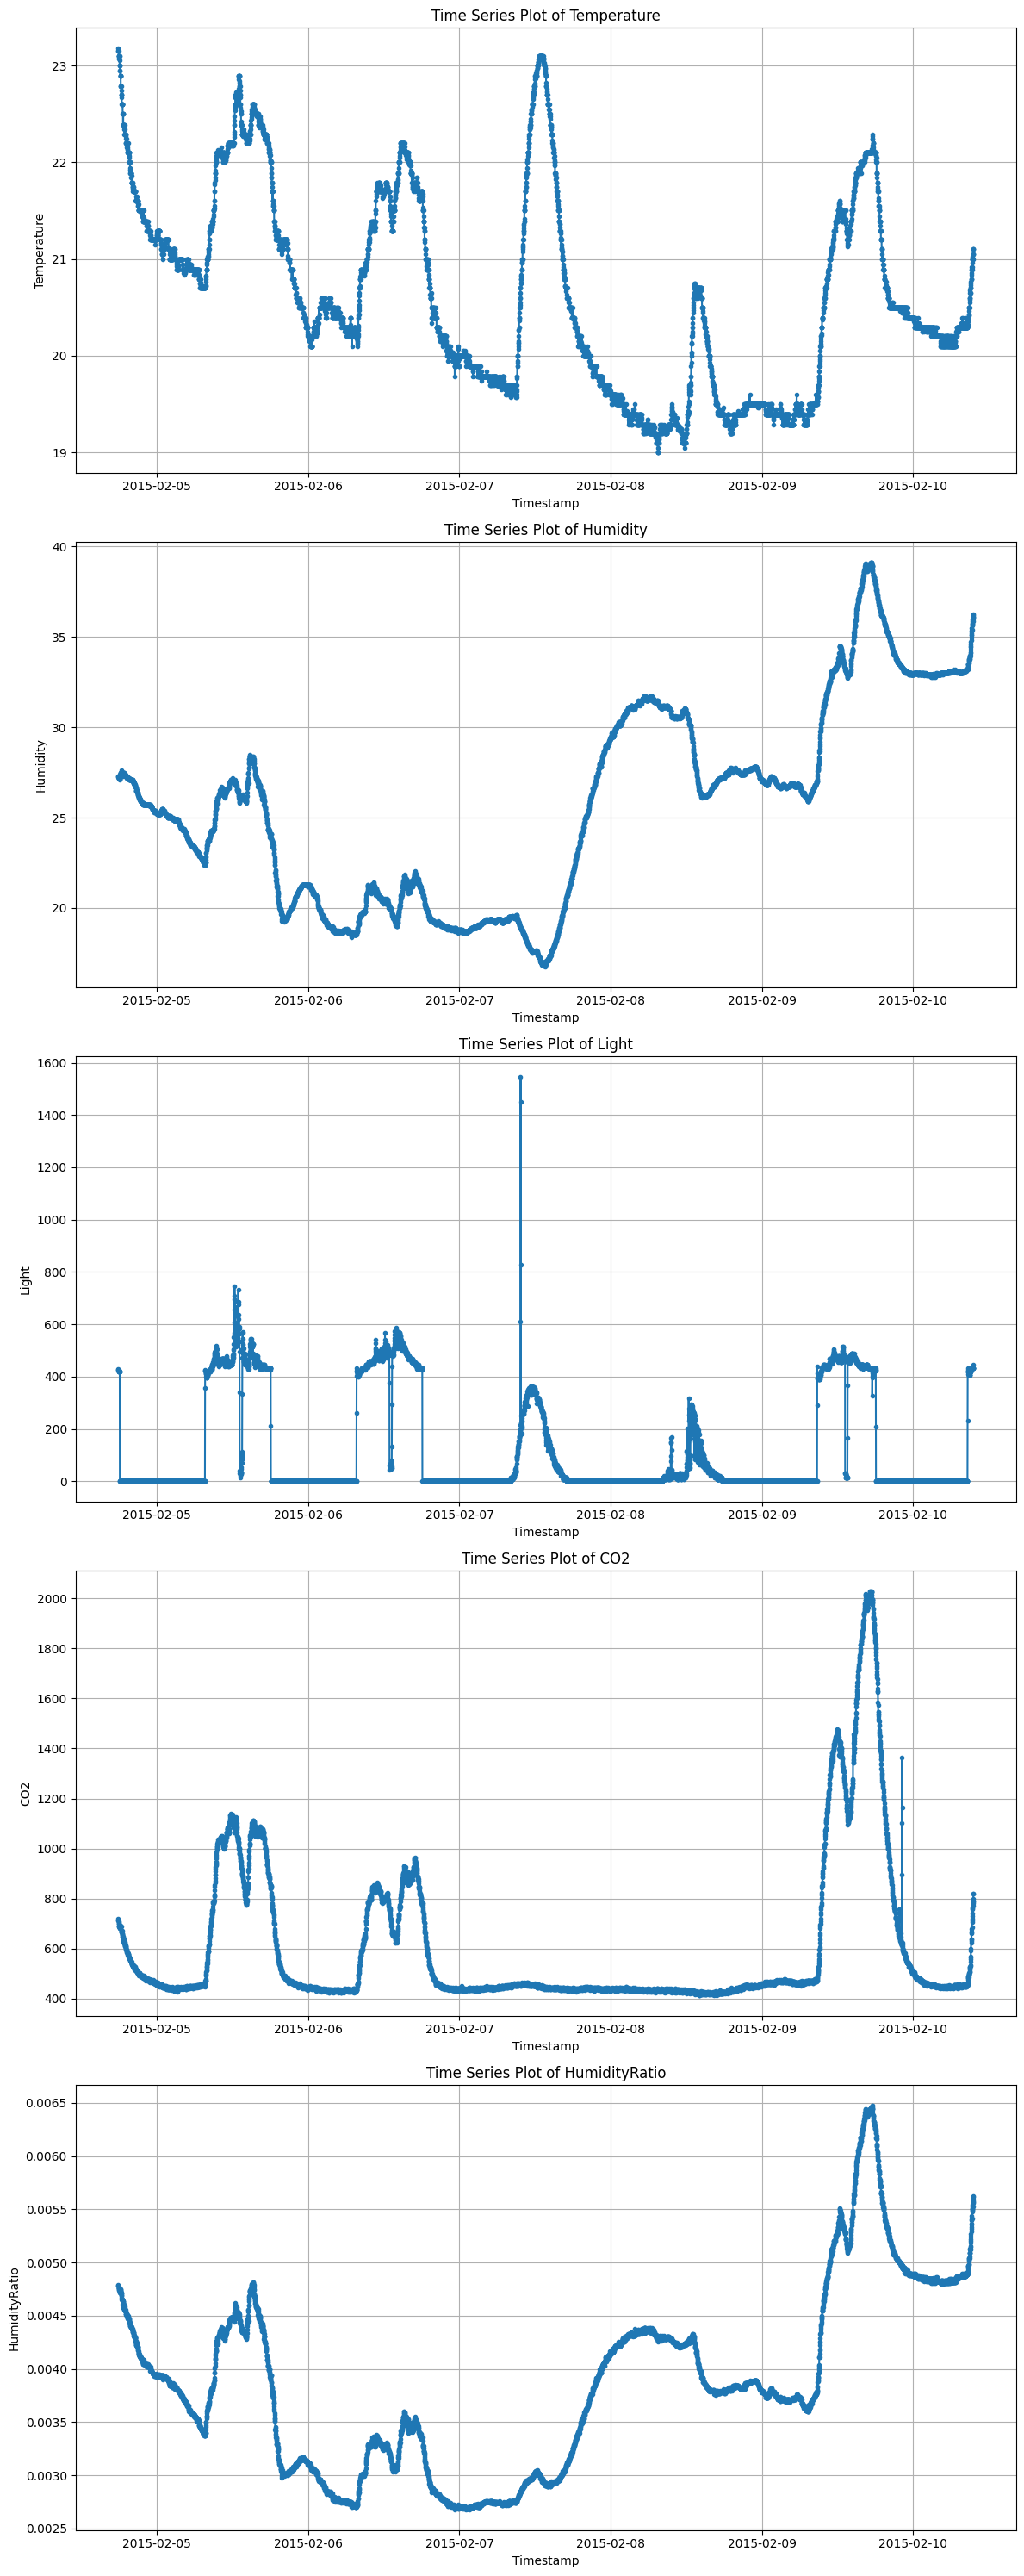

In [133]:
train['date'] = pd.to_datetime(train['date'])
cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, 6 * len(cols)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(cols):
    axes[i].plot(train['date'], train[column], linestyle='-', marker='o', markersize=3)
    axes[i].set_title(f'Time Series Plot of {column}')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [134]:
train.corr()

<ipython-input-134-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


<ipython-input-135-02974f9c7058>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)


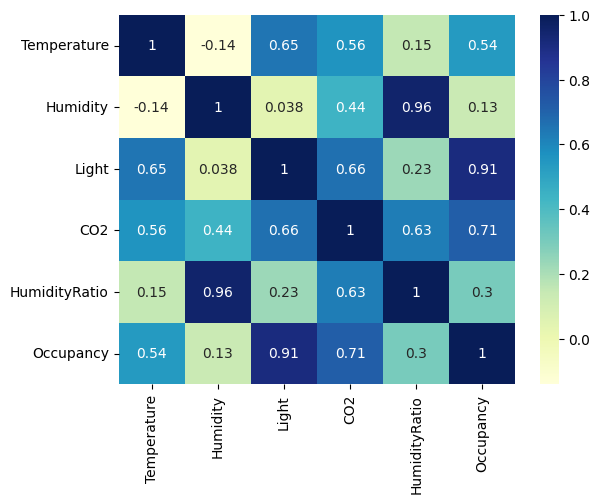

In [135]:
corrplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is strong correlation between Light and Occupancy.
CO2 level also has high correlation with Occupancy.

Humidity and HumidityRatio have high correlation with each other. This leads to multicollinearity. So to avoid this we can drop one of these columns.

In [136]:
train = train.drop(['Humidity','date'], axis=1)
val = val.drop(['date'], axis=1)
test = test.drop(['date'], axis=1)

In [137]:
scaler = MinMaxScaler()
model = scaler.fit(train)
scaled_train = model.transform(train)

In [138]:
scaler = MinMaxScaler()
model = scaler.fit(val)
scaled_val = model.transform(val)

In [139]:
scaler = MinMaxScaler()
model = scaler.fit(test)
scaled_test = model.transform(test)

In [140]:
train = pd.DataFrame(scaled_train, columns=['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])
test = pd.DataFrame(scaled_test, columns=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])
val = pd.DataFrame(scaled_val, columns=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])

In [141]:
model_1 = train[['CO2', 'Light',  'Occupancy']]

In [142]:
model_2 = train[['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

## Train, Test and Validation

In [143]:
X_train = train[['Temperature', 'Light', 'CO2', 'HumidityRatio']]
y_train = train[['Occupancy']]
X_test = test[['Temperature', 'Light', 'CO2', 'HumidityRatio']]
y_test = test[['Occupancy']]

In [144]:
X_val = val[['Temperature', 'Light', 'CO2', 'HumidityRatio']]
y_val = val[['Occupancy']]

In [145]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)
X_val, y_val = sm.fit_resample(X_val, y_val)

In [146]:
balanced = [X_train, y_train]
trainsm = pd.concat(balanced)

### Logistic Regression

In [147]:
accuracies = {}
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 97.64%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
print('Intercept', lr.intercept_[0])
print('Coefficients', lr.coef_)

Intercept -4.322205891033274
Coefficients [[-2.24536353 24.09782263  7.42003247 -0.37272488]]


In [149]:
acc = lr.score(X_train,y_train)*100

accuracies['Logistic Regression'] = acc
print("Train Accuracy {:.2f}%".format(acc))

Train Accuracy 99.25%


### Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc1 = dtc.score(X_test,y_test)*100

accuracies['Decision Tree Classifier'] = acc1
print("Test Accuracy {:.2f}%".format(acc1))

Test Accuracy 98.02%


In [151]:
acc1 = dtc.score(X_train,y_train)*100

accuracies['Decision Tree Classifier'] = acc1
print("Train Accuracy {:.2f}%".format(acc1))

Train Accuracy 99.19%


### Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(max_depth=2, random_state=0)
clfr.fit(X_train, y_train)
y_pred = clfr.predict(X_test)
acc1 = clfr.score(X_test,y_test)*100

accuracies['Random Forest Classifier'] = acc1
print("Test Accuracy {:.2f}%".format(acc1))

<ipython-input-152-a9669c54d2fe>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clfr.fit(X_train, y_train)


Test Accuracy 98.02%


In [153]:
acc1 = clfr.score(X_train,y_train)*100

accuracies['Random Forest Classifier'] = acc1
print("Train Accuracy {:.2f}%".format(acc1))

Train Accuracy 99.17%


### Ada Boost Classifier

In [154]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)*100

accuracies['AdaBoostClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy 97.70%


In [155]:
acc = clf.score(X_train,y_train)*100

accuracies['AdaBoostClassifier'] = acc
print("Train Accuracy {:.2f}%".format(acc))

Train Accuracy 99.57%


## Hyperparameter Tuning

In [156]:
!pip install optuna

In [157]:
import optuna

In [158]:
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import cross_val_score
def kappa_score(y_test, y_pred):
    return cohen_kappa_score(y_test, y_pred)

Kappa = make_scorer(kappa_score)

In [159]:
def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }
    clf = RandomForestClassifier(random_state = 1234, **param_space)
    clf.fit(X_train, y_train)
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=5, scoring=Kappa).mean()

In [160]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-09-02 17:58:05,326] A new study created in memory with name: no-name-6e60b5bb-b58a-44bf-9f45-857dcefbf499
<ipython-input-159-5aa465e7ad9f>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2023-09-02 17:58:49,528] Trial 0 finished with value: 0.938728746905505 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.938728746905505.
<ipython-input-159-5aa465e7ad9f>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2023-09-02 17:59:04,320] Trial 1 finished with value: 0.9657044664852595 and parameters: {'n_estimators': 200, 'max_depth'

In [161]:
study.best_params

{'n_estimators': 700,
 'max_depth': 8,
 'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'criterion': 'gini',
 'bootstrap': True,
 'class_weight': 'balanced'}

In [162]:
rfc_params = {'n_estimators': 600,
 'max_depth': 3,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'criterion': 'gini',
 'bootstrap': True,
 'class_weight': None}

rfc = RandomForestClassifier(**rfc_params)

In [163]:
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)*100

<ipython-input-163-3034b5688785>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


98.02126402835204

[[1621   72]
 [   6 1687]]
0.9769639692852924


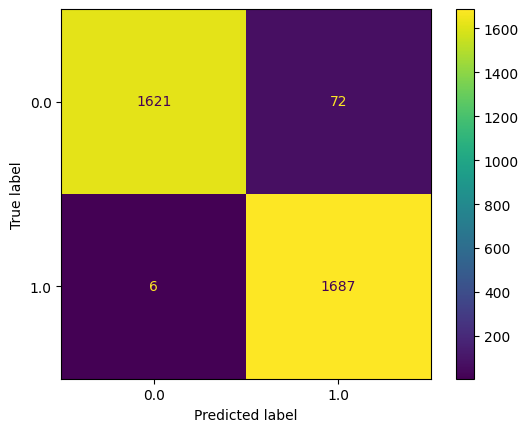

In [171]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
custom_cmap = plt.get_cmap('Blues')
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
print(metrics.accuracy_score(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [165]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

print(TP, TN, FP, FN)

total = TP+TN+FP+FN
Accuracy = (TP+TN)/total
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
F1_Score = 2*TP/(2*TP + FP + FN)
print(Accuracy, Specificity, Sensitivity, F1_Score)

fpr = FP/(FP+TN)
tpr = Sensitivity

1687 1621 72 6
0.9769639692852924 0.9574719432959244 0.9964559952746603 0.977404403244496


**Accuracy:** The accuracy of 97.69% indicates that the overall model performance is relatively high. It suggests that the model correctly predicts the outcome for approximately 97.69% of the cases.<br>

**Specificity:** The specificity of 95.74% suggests that the model performs well in correctly identifying negative cases. Specifically, it indicates that the model correctly classifies about 95.74% of the true negatives.<br>

**Sensitivity:** The sensitivity (also known as recall or true positive rate) of 99.64% suggests that the model is effective at identifying positive cases. It indicates that the model correctly identifies approximately 99.64% of the true positives.<br>

**F1 score:** The F1 score of 97.74% is a measure that combines precision and recall (sensitivity) into a single metric. It is useful when you want to balance both false positives and false negatives. The F1 score of 97.74% suggests that the model has a good trade-off between precision and recall, providing a balanced performance.

In [166]:
pip install scikit-plot

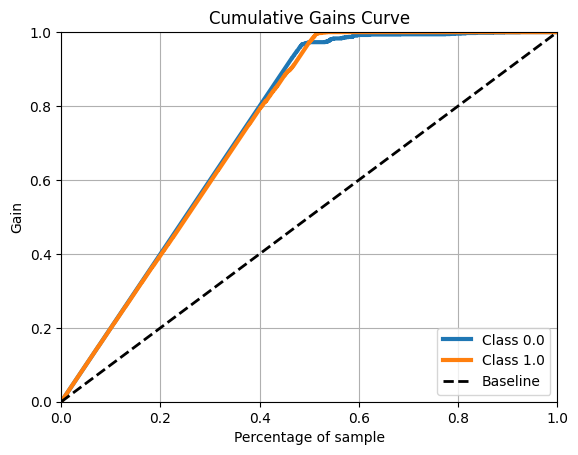

In [167]:
# Lift Curve
from scikitplot.metrics import plot_cumulative_gain as pcg
logis_lift = lr.predict_proba(X_test)
pcg(y_test, logis_lift)
plt.show()

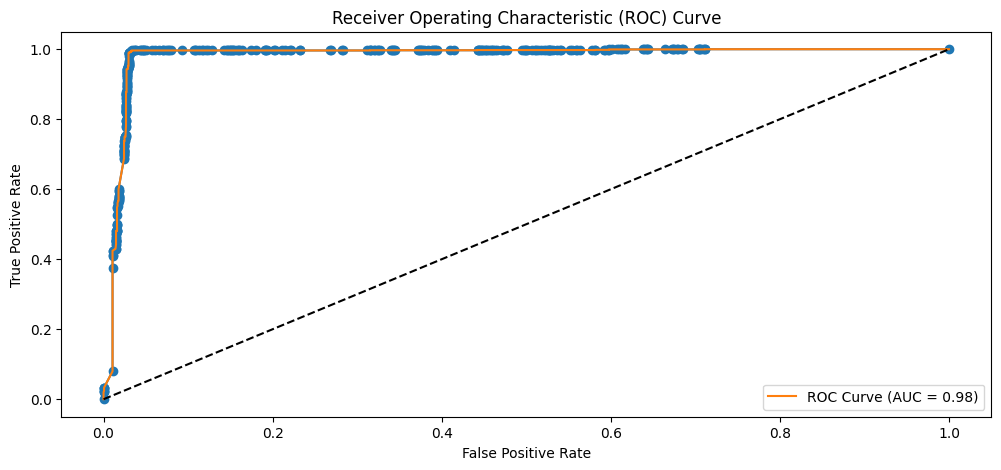

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_LR = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_LR)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()